# Convolutional Neural Networks

## Project: Write an Algorithm for Landmark Classification


### Transfer learning

In the previous notebook we have trained our own CNN and we got a certain performance. Let's see how hard it is to match that performance with transfer learning.

---
## <img src="static_images/icons/noun-advance-2109145.png" alt=">" style="width:50px"/> Step 0: Setting up

The following cells make sure that your environment is setup correctly and check that your GPU is available and ready to go. You have to execute them every time you restart your notebook.

In [1]:
# Install requireme£nts
!pip install -r requirements.txt | grep -v "already satisfied"

Defaulting to user installation because normal site-packages is not writeable
  Created wheel for bokeh: filename=bokeh-2.1.1-py3-none-any.whl size=9257186 sha256=4db2d1346fdfdd6cd8f4c37257960da2f09b4dfa9803718d7676c0b6d4d7b5ca
  Stored in directory: /root/.cache/pip/wheels/f7/55/ff/f3d7554e69382d31cf7ad857cf518af9b923134fca7d925187
Successfully built bokeh
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [3]:
from src.helpers import setup_env

# If running locally, this will download dataset (make sure you have at 
# least 2 Gb of space on your hard drive)
setup_env()

GPU available
Dataset already downloaded. If you need to re-download, please delete the directory /data/DLND/C2/landmark_images
Reusing cached mean and std


---
## <img src="static_images/icons/noun-advance-2109145.png" alt=">" style="width:50px"/> Step 1: Create transfer learning architecture

Open the file `src/transfer.py` and complete the `get_model_transfer_learning` function. When you are done, execute this test:

In [7]:
!pytest -vv src/transfer.py

============================= test session starts ==============================
platform linux -- Python 3.7.6, pytest-7.1.1, pluggy-1.2.0 -- /opt/conda/bin/python3.7
cachedir: .pytest_cache
rootdir: /workspace/home
collected 1 item                                                               

src/transfer.py::test_get_model_transfer_learning PASSED                 [100%]

============================== 1 passed in 10.91s ==============================


---
## <img src="static_images/icons/noun-advance-2109145.png" alt=">" style="width:50px"/> Step 2: Train, validation and test

Let's train our transfer learning model! Let's start defining the hyperparameters:

In [10]:
from src.data import get_data_loaders
from src.optimization import get_optimizer, get_loss
from src.train import optimize
from src.transfer import get_model_transfer_learning

In [8]:
batch_size = 64  # size of the minibatch for stochastic gradient descent (or Adam)
valid_size = 0.2  # fraction of the training data to reserve for validation
num_epochs = 50  # number of epochs for training
num_classes = 50  # number of classes. Do not change this
learning_rate = 0.001  # Learning rate for SGD (or Adam)
opt = 'adam'      # optimizer. 'sgd' or 'adam'
weight_decay = 0.0 # regularization. Increase this to combat overfitting

In [9]:


# Get a model using get_model_transfer_learning. Use one of the names reported here:
# https://pytorch.org/vision/0.10/models.html
# For example, if you want to load ResNet 18, use "resnet18"
# NOTE: use the hyperparameters defined in the previous cell, do NOT copy/paste the
# values
model_transfer = get_model_transfer_learning(n_classes=num_classes)

# train the model
data_loaders = get_data_loaders(batch_size=batch_size)
optimizer = get_optimizer(
    model_transfer,
    learning_rate=learning_rate,
    optimizer=opt,
    weight_decay=weight_decay,
)
loss = get_loss()

optimize(
    data_loaders,
    model_transfer,
    optimizer,
    loss,
    n_epochs=num_epochs,
    save_path="checkpoints/model_transfer.pt",
    interactive_tracking=False)

Reusing cached mean and std
Dataset mean: tensor([0.4638, 0.4725, 0.4687]), std: tensor([0.2699, 0.2706, 0.3018])


Validating: 100%|███████████████████████████████| 16/16 [00:14<00:00,  1.12it/s]

both loss calculated
Epoch: 1 	Training Loss: 3.317619 	Validation Loss: 3.053112



Testing: 100%|██████████████████████████████████| 20/20 [00:17<00:00,  1.12it/s]


Test Loss: 2.451842


Test Accuracy: 49% (618/1250)
New minimum validation loss: 3.053112. Saving model ...


Validating: 100%|███████████████████████████████| 16/16 [00:14<00:00,  1.11it/s]

both loss calculated
Epoch: 2 	Training Loss: 2.218943 	Validation Loss: 2.611629



Testing: 100%|██████████████████████████████████| 20/20 [00:17<00:00,  1.12it/s]

Test Loss: 1.821580


Test Accuracy: 59% (747/1250)
New minimum validation loss: 2.611629. Saving model ...



Validating: 100%|███████████████████████████████| 16/16 [00:14<00:00,  1.07it/s]

both loss calculated
Epoch: 3 	Training Loss: 1.794624 	Validation Loss: 2.461440



Testing: 100%|██████████████████████████████████| 20/20 [00:18<00:00,  1.11it/s]


Test Loss: 1.526495


Test Accuracy: 65% (815/1250)
New minimum validation loss: 2.461440. Saving model ...


Validating: 100%|███████████████████████████████| 16/16 [00:14<00:00,  1.13it/s]

both loss calculated
Epoch: 4 	Training Loss: 1.574474 	Validation Loss: 2.449582



Testing: 100%|██████████████████████████████████| 20/20 [00:18<00:00,  1.11it/s]

Test Loss: 1.399009


Test Accuracy: 67% (841/1250)



Validating: 100%|███████████████████████████████| 16/16 [00:14<00:00,  1.07it/s]

both loss calculated
Epoch: 5 	Training Loss: 1.421516 	Validation Loss: 2.342779



Testing: 100%|██████████████████████████████████| 20/20 [00:17<00:00,  1.12it/s]


Test Loss: 1.281243


Test Accuracy: 69% (864/1250)
New minimum validation loss: 2.342779. Saving model ...


Validating: 100%|███████████████████████████████| 16/16 [00:14<00:00,  1.12it/s]

both loss calculated
Epoch: 6 	Training Loss: 1.308127 	Validation Loss: 2.354899



Testing: 100%|██████████████████████████████████| 20/20 [00:18<00:00,  1.09it/s]

Test Loss: 1.262580


Test Accuracy: 67% (849/1250)



Validating: 100%|███████████████████████████████| 16/16 [00:14<00:00,  1.11it/s]

both loss calculated
Epoch: 7 	Training Loss: 1.234707 	Validation Loss: 2.247535



Testing: 100%|██████████████████████████████████| 20/20 [00:18<00:00,  1.09it/s]

Test Loss: 1.182437


Test Accuracy: 70% (884/1250)
New minimum validation loss: 2.247535. Saving model ...



Validating: 100%|███████████████████████████████| 16/16 [00:14<00:00,  1.11it/s]

both loss calculated
Epoch: 8 	Training Loss: 1.166828 	Validation Loss: 2.292524



Testing: 100%|██████████████████████████████████| 20/20 [00:18<00:00,  1.09it/s]

Test Loss: 1.153759


Test Accuracy: 70% (877/1250)



Validating: 100%|███████████████████████████████| 16/16 [00:14<00:00,  1.12it/s]

both loss calculated
Epoch: 9 	Training Loss: 1.128668 	Validation Loss: 2.266526



Testing: 100%|██████████████████████████████████| 20/20 [00:18<00:00,  1.09it/s]

Test Loss: 1.152757


Test Accuracy: 70% (882/1250)



Validating: 100%|███████████████████████████████| 16/16 [00:14<00:00,  1.08it/s]

both loss calculated
Epoch: 10 	Training Loss: 1.086304 	Validation Loss: 2.237952



Testing: 100%|██████████████████████████████████| 20/20 [00:18<00:00,  1.10it/s]

Test Loss: 1.129043


Test Accuracy: 71% (893/1250)



Validating: 100%|███████████████████████████████| 16/16 [00:14<00:00,  1.10it/s]

both loss calculated
Epoch: 11 	Training Loss: 1.056735 	Validation Loss: 2.281281



Testing: 100%|██████████████████████████████████| 20/20 [00:19<00:00,  1.04it/s]

Test Loss: 1.090696


Test Accuracy: 72% (904/1250)



Validating: 100%|███████████████████████████████| 16/16 [00:14<00:00,  1.10it/s]

both loss calculated
Epoch: 12 	Training Loss: 1.011385 	Validation Loss: 2.345136



Testing: 100%|██████████████████████████████████| 20/20 [00:18<00:00,  1.10it/s]

Test Loss: 1.116775


Test Accuracy: 70% (886/1250)



Validating: 100%|███████████████████████████████| 16/16 [00:13<00:00,  1.15it/s]

both loss calculated
Epoch: 13 	Training Loss: 0.982381 	Validation Loss: 2.288429



Testing: 100%|██████████████████████████████████| 20/20 [00:17<00:00,  1.13it/s]

Test Loss: 1.075612


Test Accuracy: 72% (905/1250)



Validating: 100%|███████████████████████████████| 16/16 [00:13<00:00,  1.14it/s]

both loss calculated
Epoch: 14 	Training Loss: 0.946453 	Validation Loss: 2.256799



Testing: 100%|██████████████████████████████████| 20/20 [00:17<00:00,  1.14it/s]

Test Loss: 1.103329


Test Accuracy: 70% (887/1250)



Validating: 100%|███████████████████████████████| 16/16 [00:14<00:00,  1.14it/s]

both loss calculated
Epoch: 15 	Training Loss: 0.918441 	Validation Loss: 2.290366



Testing: 100%|██████████████████████████████████| 20/20 [00:17<00:00,  1.13it/s]

Test Loss: 1.045731


Test Accuracy: 73% (916/1250)



Validating: 100%|███████████████████████████████| 16/16 [00:14<00:00,  1.12it/s]

both loss calculated
Epoch: 16 	Training Loss: 0.906225 	Validation Loss: 2.272605



Testing: 100%|██████████████████████████████████| 20/20 [00:18<00:00,  1.09it/s]

Test Loss: 1.045243


Test Accuracy: 72% (907/1250)



Validating: 100%|███████████████████████████████| 16/16 [00:14<00:00,  1.09it/s]

both loss calculated
Epoch: 17 	Training Loss: 0.892174 	Validation Loss: 2.291112



Testing: 100%|██████████████████████████████████| 20/20 [00:18<00:00,  1.06it/s]

Test Loss: 1.044542


Test Accuracy: 72% (910/1250)



Validating: 100%|███████████████████████████████| 16/16 [00:14<00:00,  1.11it/s]

both loss calculated
Epoch: 18 	Training Loss: 0.884582 	Validation Loss: 2.219217



Testing: 100%|██████████████████████████████████| 20/20 [00:18<00:00,  1.06it/s]


Test Loss: 1.057978


Test Accuracy: 72% (909/1250)
New minimum validation loss: 2.219217. Saving model ...


Validating: 100%|███████████████████████████████| 16/16 [00:14<00:00,  1.09it/s]

both loss calculated
Epoch: 19 	Training Loss: 0.878917 	Validation Loss: 2.322896



Testing: 100%|██████████████████████████████████| 20/20 [00:18<00:00,  1.08it/s]

Test Loss: 1.050262


Test Accuracy: 73% (913/1250)



Validating: 100%|███████████████████████████████| 16/16 [00:14<00:00,  1.10it/s]

both loss calculated
Epoch: 20 	Training Loss: 0.890494 	Validation Loss: 2.295643



Testing: 100%|██████████████████████████████████| 20/20 [00:18<00:00,  1.07it/s]

Test Loss: 1.058578


Test Accuracy: 72% (901/1250)



Validating: 100%|███████████████████████████████| 16/16 [00:14<00:00,  1.12it/s]

both loss calculated
Epoch: 21 	Training Loss: 0.879353 	Validation Loss: 2.366952



Testing: 100%|██████████████████████████████████| 20/20 [00:17<00:00,  1.12it/s]

Test Loss: 1.063999


Test Accuracy: 71% (896/1250)



Validating: 100%|███████████████████████████████| 16/16 [00:14<00:00,  1.10it/s]

both loss calculated
Epoch: 22 	Training Loss: 0.864966 	Validation Loss: 2.268424



Testing: 100%|██████████████████████████████████| 20/20 [00:18<00:00,  1.11it/s]

Test Loss: 1.051763


Test Accuracy: 73% (916/1250)



Validating: 100%|███████████████████████████████| 16/16 [00:14<00:00,  1.08it/s]

both loss calculated
Epoch: 23 	Training Loss: 0.877958 	Validation Loss: 2.280443



Testing: 100%|██████████████████████████████████| 20/20 [00:18<00:00,  1.08it/s]

Test Loss: 1.051339


Test Accuracy: 73% (920/1250)



Validating: 100%|███████████████████████████████| 16/16 [00:14<00:00,  1.11it/s]

both loss calculated
Epoch: 24 	Training Loss: 0.882298 	Validation Loss: 2.303664



Testing: 100%|██████████████████████████████████| 20/20 [00:19<00:00,  1.03it/s]

Test Loss: 1.042794


Test Accuracy: 73% (914/1250)



Validating: 100%|███████████████████████████████| 16/16 [00:14<00:00,  1.11it/s]

both loss calculated
Epoch: 25 	Training Loss: 0.870144 	Validation Loss: 2.270490



Testing: 100%|██████████████████████████████████| 20/20 [00:17<00:00,  1.12it/s]

Test Loss: 1.010480


Test Accuracy: 73% (917/1250)



Validating: 100%|███████████████████████████████| 16/16 [00:14<00:00,  1.10it/s]

both loss calculated
Epoch: 26 	Training Loss: 0.869535 	Validation Loss: 2.273601



Testing: 100%|██████████████████████████████████| 20/20 [00:18<00:00,  1.08it/s]

Test Loss: 1.035289


Test Accuracy: 74% (932/1250)



Validating: 100%|███████████████████████████████| 16/16 [00:15<00:00,  1.07it/s]

both loss calculated
Epoch: 27 	Training Loss: 0.862098 	Validation Loss: 2.319127



Testing: 100%|██████████████████████████████████| 20/20 [00:18<00:00,  1.07it/s]

Test Loss: 1.051456


Test Accuracy: 72% (907/1250)



Validating: 100%|███████████████████████████████| 16/16 [00:15<00:00,  1.07it/s]

both loss calculated
Epoch: 28 	Training Loss: 0.871032 	Validation Loss: 2.260579



Testing: 100%|██████████████████████████████████| 20/20 [00:18<00:00,  1.10it/s]

Test Loss: 1.048723


Test Accuracy: 74% (925/1250)



Validating: 100%|███████████████████████████████| 16/16 [00:14<00:00,  1.08it/s]

both loss calculated
Epoch: 29 	Training Loss: 0.875335 	Validation Loss: 2.270845



Testing: 100%|██████████████████████████████████| 20/20 [00:18<00:00,  1.09it/s]

Test Loss: 1.058958


Test Accuracy: 73% (922/1250)



Validating: 100%|███████████████████████████████| 16/16 [00:14<00:00,  1.09it/s]

both loss calculated
Epoch: 30 	Training Loss: 0.861348 	Validation Loss: 2.319631



Testing: 100%|██████████████████████████████████| 20/20 [00:18<00:00,  1.09it/s]

Test Loss: 1.024014


Test Accuracy: 72% (911/1250)



Validating: 100%|███████████████████████████████| 16/16 [00:14<00:00,  1.11it/s]

both loss calculated
Epoch: 31 	Training Loss: 0.870201 	Validation Loss: 2.242029



Testing: 100%|██████████████████████████████████| 20/20 [00:17<00:00,  1.12it/s]

Test Loss: 1.043768


Test Accuracy: 72% (910/1250)



Validating: 100%|███████████████████████████████| 16/16 [00:14<00:00,  1.10it/s]

both loss calculated
Epoch: 32 	Training Loss: 0.866397 	Validation Loss: 2.272509



Testing: 100%|██████████████████████████████████| 20/20 [00:17<00:00,  1.13it/s]

Test Loss: 1.051712


Test Accuracy: 72% (900/1250)



Validating: 100%|███████████████████████████████| 16/16 [00:14<00:00,  1.10it/s]

both loss calculated
Epoch: 33 	Training Loss: 0.859261 	Validation Loss: 2.357542



Testing: 100%|██████████████████████████████████| 20/20 [00:17<00:00,  1.12it/s]

Test Loss: 1.038980


Test Accuracy: 72% (907/1250)



Validating: 100%|███████████████████████████████| 16/16 [00:14<00:00,  1.10it/s]

both loss calculated
Epoch: 34 	Training Loss: 0.865070 	Validation Loss: 2.323582



Testing: 100%|██████████████████████████████████| 20/20 [00:19<00:00,  1.05it/s]

Test Loss: 1.041748


Test Accuracy: 73% (923/1250)



Validating: 100%|███████████████████████████████| 16/16 [00:15<00:00,  1.07it/s]

both loss calculated
Epoch: 35 	Training Loss: 0.869748 	Validation Loss: 2.304793



Testing: 100%|██████████████████████████████████| 20/20 [00:19<00:00,  1.04it/s]

Test Loss: 1.026677


Test Accuracy: 72% (904/1250)



Validating: 100%|███████████████████████████████| 16/16 [00:14<00:00,  1.07it/s]

both loss calculated
Epoch: 36 	Training Loss: 0.852480 	Validation Loss: 2.285779



Testing: 100%|██████████████████████████████████| 20/20 [00:18<00:00,  1.10it/s]

Test Loss: 1.037615


Test Accuracy: 72% (904/1250)



Validating: 100%|███████████████████████████████| 16/16 [00:14<00:00,  1.11it/s]

both loss calculated
Epoch: 37 	Training Loss: 0.864434 	Validation Loss: 2.274893



Testing: 100%|██████████████████████████████████| 20/20 [00:18<00:00,  1.10it/s]

Test Loss: 1.032093


Test Accuracy: 74% (927/1250)



Validating: 100%|███████████████████████████████| 16/16 [00:14<00:00,  1.10it/s]

both loss calculated
Epoch: 38 	Training Loss: 0.856284 	Validation Loss: 2.308840



Testing: 100%|██████████████████████████████████| 20/20 [00:18<00:00,  1.09it/s]

Test Loss: 1.051819


Test Accuracy: 71% (899/1250)



Validating: 100%|███████████████████████████████| 16/16 [00:14<00:00,  1.10it/s]

both loss calculated
Epoch: 39 	Training Loss: 0.862947 	Validation Loss: 2.258831



Testing: 100%|██████████████████████████████████| 20/20 [00:18<00:00,  1.10it/s]

Test Loss: 1.025635


Test Accuracy: 73% (923/1250)



Validating: 100%|███████████████████████████████| 16/16 [00:14<00:00,  1.10it/s]

both loss calculated
Epoch: 40 	Training Loss: 0.868710 	Validation Loss: 2.312337



Testing: 100%|██████████████████████████████████| 20/20 [00:18<00:00,  1.10it/s]

Test Loss: 1.049945


Test Accuracy: 71% (893/1250)



Validating: 100%|███████████████████████████████| 16/16 [00:14<00:00,  1.09it/s]

both loss calculated
Epoch: 41 	Training Loss: 0.866015 	Validation Loss: 2.323219



Testing: 100%|██████████████████████████████████| 20/20 [00:18<00:00,  1.08it/s]

Test Loss: 1.035150


Test Accuracy: 74% (928/1250)



Validating: 100%|███████████████████████████████| 16/16 [00:14<00:00,  1.12it/s]

both loss calculated
Epoch: 42 	Training Loss: 0.860744 	Validation Loss: 2.326466



Testing: 100%|██████████████████████████████████| 20/20 [00:18<00:00,  1.09it/s]

Test Loss: 1.056410


Test Accuracy: 72% (910/1250)



Validating: 100%|███████████████████████████████| 16/16 [00:14<00:00,  1.10it/s]

both loss calculated
Epoch: 43 	Training Loss: 0.874363 	Validation Loss: 2.330683



Testing: 100%|██████████████████████████████████| 20/20 [00:17<00:00,  1.12it/s]

Test Loss: 1.041096


Test Accuracy: 73% (914/1250)



Validating: 100%|███████████████████████████████| 16/16 [00:14<00:00,  1.10it/s]

both loss calculated
Epoch: 44 	Training Loss: 0.858524 	Validation Loss: 2.291215



Testing: 100%|██████████████████████████████████| 20/20 [00:18<00:00,  1.11it/s]

Test Loss: 1.026558


Test Accuracy: 73% (916/1250)



Validating: 100%|███████████████████████████████| 16/16 [00:14<00:00,  1.11it/s]

both loss calculated
Epoch: 45 	Training Loss: 0.859074 	Validation Loss: 2.259554



Testing: 100%|██████████████████████████████████| 20/20 [00:18<00:00,  1.07it/s]

Test Loss: 1.038241


Test Accuracy: 73% (919/1250)



Validating: 100%|███████████████████████████████| 16/16 [00:14<00:00,  1.10it/s]

both loss calculated
Epoch: 46 	Training Loss: 0.845948 	Validation Loss: 2.257480



Testing: 100%|██████████████████████████████████| 20/20 [00:19<00:00,  1.05it/s]

Test Loss: 1.034164


Test Accuracy: 73% (917/1250)



Validating: 100%|███████████████████████████████| 16/16 [00:14<00:00,  1.11it/s]

both loss calculated
Epoch: 47 	Training Loss: 0.862508 	Validation Loss: 2.294713



Testing: 100%|██████████████████████████████████| 20/20 [00:18<00:00,  1.08it/s]

Test Loss: 1.034492


Test Accuracy: 73% (915/1250)



Validating: 100%|███████████████████████████████| 16/16 [00:14<00:00,  1.12it/s]

both loss calculated
Epoch: 48 	Training Loss: 0.872645 	Validation Loss: 2.322279



Testing: 100%|██████████████████████████████████| 20/20 [00:18<00:00,  1.09it/s]

Test Loss: 1.063881


Test Accuracy: 72% (904/1250)



Validating: 100%|███████████████████████████████| 16/16 [00:14<00:00,  1.09it/s]

both loss calculated
Epoch: 49 	Training Loss: 0.859532 	Validation Loss: 2.275014



Testing: 100%|██████████████████████████████████| 20/20 [00:18<00:00,  1.08it/s]

Test Loss: 1.063813


Test Accuracy: 72% (907/1250)



Validating: 100%|███████████████████████████████| 16/16 [00:14<00:00,  1.07it/s]

both loss calculated
Epoch: 50 	Training Loss: 0.869112 	Validation Loss: 2.316035



Testing: 100%|██████████████████████████████████| 20/20 [00:18<00:00,  1.07it/s]

Test Loss: 1.051001


Test Accuracy: 72% (908/1250)


<img src="static_images/icons/noun-question-mark-869751.png" alt="?" style="width:25px"/> __Question:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

<img src="static_images/icons/noun-answer-3361020.png" alt=">" style="width:25px"/>  __Answer:__

Using a pre-trained model like ResNet18 allows leveraging learned features from a large dataset (e.g., ImageNet), which can significantly improve performance and reduce training time.

1. num_ftrs = model.fc.in_features retrieves the number of features from the last convolutional layer.

2. The fully connected layers are redefined using nn.Sequential to include 1 linear layers , The well pre trained resnet architecture xtract excellent feature using convolution and ther eis little need to add comple liner layers with many neurons as it might lead to overfitting and expensive computation time, so I stick with only 1 layer


Now play with the hyperparameters and see which performance you can get on the validation set. You should get at least 60% for a passing grade, but a good model choice and a good training strategy could get you up to 80% or so. Let's see how close you can get!

---
## <img src="static_images/icons/noun-advance-2109145.png" alt=">" style="width:50px"/> Step 3: Test the Model

Try out your model on the test dataset of landmark images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60% and matches more or less what you got on the validation set (otherwise you're overfitting!)

In [11]:
import torch
from src.train import one_epoch_test
from src.transfer import get_model_transfer_learning

model_transfer = get_model_transfer_learning("resnet18", n_classes=num_classes)
data_loaders = get_data_loaders(batch_size=batch_size)
optimizer = get_optimizer(
    model_transfer,
    learning_rate=learning_rate,
    optimizer=opt,
    weight_decay=weight_decay,
)
loss = get_loss()
# Load saved weights
model_transfer.load_state_dict(torch.load('checkpoints/model_transfer.pt'))

one_epoch_test(data_loaders['test'], model_transfer, loss)

Reusing cached mean and std
Dataset mean: tensor([0.4638, 0.4725, 0.4687]), std: tensor([0.2699, 0.2706, 0.3018])


Testing: 100%|██████████████████████████████████| 20/20 [00:17<00:00,  1.13it/s]

Test Loss: 1.043460


Test Accuracy: 73% (916/1250)


1.0434604734182358

---
## <img src="static_images/icons/noun-advance-2109145.png" alt=">" style="width:50px"/> Step 4: Export using torchscript

Now, just like we did with our original model, we export the best fit model using torchscript so that it can be used in our application:

In [12]:
from src.predictor import Predictor
from src.helpers import compute_mean_and_std

# First let's get the class names from our data loaders
class_names = data_loaders["train"].dataset.classes

# Then let's move the model_transfer to the CPU
# (we don't need GPU for inference)
model_transfer = model_transfer.cpu()
# Let's make sure we use the right weights by loading the
# best weights we have found during training
# NOTE: remember to use map_location='cpu' so the weights
# are loaded on the CPU (and not the GPU)
model_transfer.load_state_dict(
    torch.load("checkpoints/model_transfer.pt", map_location="cpu")
)

# Let's wrap our model using the predictor class
mean, std = compute_mean_and_std()
predictor = Predictor(model_transfer, class_names, mean, std).cpu()

# Export using torch.jit.script
scripted_predictor = torch.jit.script(predictor)
scripted_predictor.save("checkpoints/transfer_exported.pt")

Reusing cached mean and std


  3%|█                                        | 33/1250 [00:37<18:48,  1.08it/s]code/__torch__/torch/nn/functional.py:70: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


  5%|██▏                                      | 67/1250 [01:26<27:48,  1.41s/it]code/__torch__/torch/nn/functional.py:70: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


  8%|███▏                                    | 101/1250 [02:07<14:36,  1.31it/s]code/__torch__/torch/nn/functional.py:70: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


 11%|████▎                                   | 135/1250 [02:38<23:36,  1.27s/it]code/__torch__/torch/nn/functional.py:70: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


 14%|█████▍                                  | 169/1250 [03:15<18:32,  1.03s/it]code/__torch__/torch/nn/functional.py:70: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


 16%|██████▍                                 | 203/1250 [03:50<17:55,  1.03s/it]code/__torch__/torch/nn/functional.py:70: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


 19%|███████▌                                | 237/1250 [04:21<19:22,  1.15s/it]code/__torch__/torch/nn/functional.py:70: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


 22%|████████▋                               | 271/1250 [04:49<18:54,  1.16s/it]code/__torch__/torch/nn/functional.py:70: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


 24%|█████████▊                              | 305/1250 [05:34<22:14,  1.41s/it]code/__torch__/torch/nn/functional.py:70: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


 27%|██████████▊                             | 339/1250 [06:11<18:57,  1.25s/it]code/__torch__/torch/nn/functional.py:70: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


 30%|███████████▉                            | 373/1250 [06:37<06:19,  2.31it/s]code/__torch__/torch/nn/functional.py:70: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


 33%|█████████████                           | 407/1250 [07:18<16:25,  1.17s/it]code/__torch__/torch/nn/functional.py:70: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


 35%|██████████████                          | 441/1250 [07:59<14:36,  1.08s/it]code/__torch__/torch/nn/functional.py:70: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


 38%|███████████████▏                        | 475/1250 [08:29<06:24,  2.02it/s]code/__torch__/torch/nn/functional.py:70: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


 41%|████████████████▎                       | 509/1250 [08:59<13:54,  1.13s/it]code/__torch__/torch/nn/functional.py:70: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


 43%|█████████████████▍                      | 543/1250 [09:38<14:50,  1.26s/it]code/__torch__/torch/nn/functional.py:70: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


 46%|██████████████████▍                     | 577/1250 [10:29<15:15,  1.36s/it]code/__torch__/torch/nn/functional.py:70: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


 49%|███████████████████▌                    | 611/1250 [11:05<10:48,  1.01s/it]code/__torch__/torch/nn/functional.py:70: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


 52%|████████████████████▋                   | 645/1250 [11:49<11:16,  1.12s/it]code/__torch__/torch/nn/functional.py:70: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


 54%|█████████████████████▋                  | 679/1250 [12:30<13:02,  1.37s/it]code/__torch__/torch/nn/functional.py:70: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


 57%|██████████████████████▊                 | 713/1250 [13:05<09:32,  1.07s/it]code/__torch__/torch/nn/functional.py:70: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


 60%|███████████████████████▉                | 747/1250 [13:49<11:14,  1.34s/it]code/__torch__/torch/nn/functional.py:70: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


 62%|████████████████████████▉               | 781/1250 [14:22<10:12,  1.31s/it]code/__torch__/torch/nn/functional.py:70: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


 65%|██████████████████████████              | 815/1250 [14:56<08:20,  1.15s/it]code/__torch__/torch/nn/functional.py:70: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


 68%|███████████████████████████▏            | 849/1250 [15:20<08:49,  1.32s/it]code/__torch__/torch/nn/functional.py:70: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


 71%|████████████████████████████▎           | 883/1250 [16:04<10:02,  1.64s/it]code/__torch__/torch/nn/functional.py:70: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


 73%|█████████████████████████████▎          | 917/1250 [16:48<05:36,  1.01s/it]code/__torch__/torch/nn/functional.py:70: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


 76%|██████████████████████████████▍         | 951/1250 [17:28<07:50,  1.57s/it]code/__torch__/torch/nn/functional.py:70: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


 79%|███████████████████████████████▌        | 985/1250 [18:16<06:44,  1.53s/it]code/__torch__/torch/nn/functional.py:70: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


 82%|███████████████████████████████▊       | 1019/1250 [19:02<03:08,  1.23it/s]code/__torch__/torch/nn/functional.py:70: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


 84%|████████████████████████████████▊      | 1053/1250 [19:38<04:35,  1.40s/it]code/__torch__/torch/nn/functional.py:70: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


 87%|█████████████████████████████████▉     | 1087/1250 [20:20<03:04,  1.13s/it]code/__torch__/torch/nn/functional.py:70: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


 90%|██████████████████████████████████▉    | 1121/1250 [21:00<03:07,  1.46s/it]code/__torch__/torch/nn/functional.py:70: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


 92%|████████████████████████████████████   | 1155/1250 [21:30<01:18,  1.20it/s]code/__torch__/torch/nn/functional.py:70: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


 95%|█████████████████████████████████████  | 1189/1250 [22:12<01:53,  1.85s/it]code/__torch__/torch/nn/functional.py:70: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


 98%|██████████████████████████████████████▏| 1223/1250 [23:22<00:32,  1.20s/it]code/__torch__/torch/nn/functional.py:70: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


100%|███████████████████████████████████████| 1250/1250 [23:54<00:00,  1.15s/it]


Accuracy: 0.72


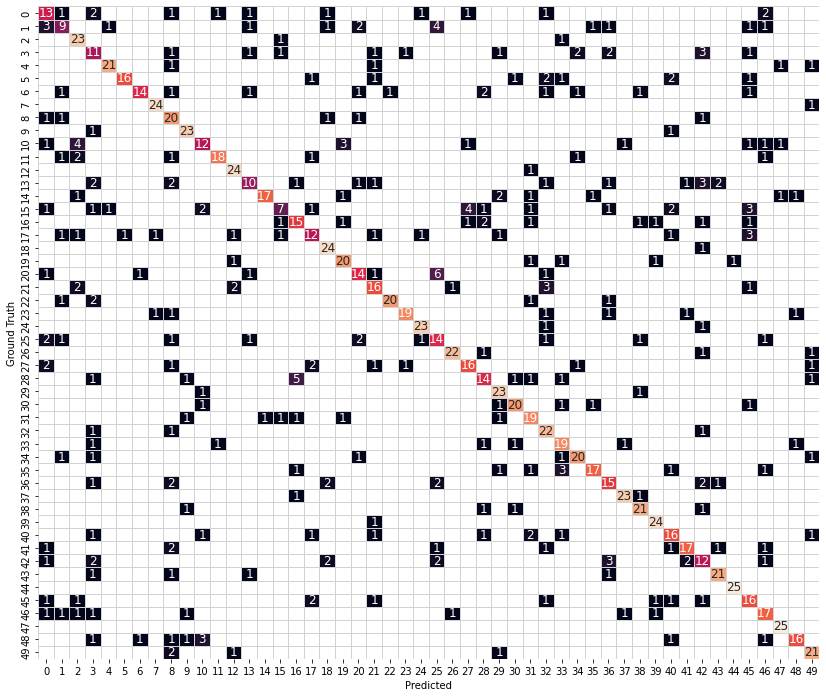

In [13]:
import torch
from src.predictor import predictor_test
from src.helpers import plot_confusion_matrix

model_reloaded = torch.jit.load("checkpoints/transfer_exported.pt")

pred, truth = predictor_test(data_loaders['test'], model_reloaded)

plot_confusion_matrix(pred, truth)